In [173]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [174]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [176]:
data = pd.read_pickle("outdir/merged.pkl")
data = data.dropna()
data["chapter"] = data.chapter.astype(int)
data["sentence_id"] = data.sentence_id.astype(int)
annotated_data = pd.DataFrame(data[data.annotations.apply(len)>0])

In [198]:
colors = ["#1b9e77",
"#d95f02",
"#7570b3",
"#e7298a",
"#66a61e",
"#e6ab02",
"#a6761d",
"#666666"]

In [116]:
vectorizer = TfidfVectorizer()
bow = np.array(vectorizer.fit_transform(data.text.values).todense())
index = vectorizer.get_feature_names_out()

def get_max_n_words(vec, index, n=10):
    max_val_inds = vec.argsort()[::-1][:n]
    return [index[ind] for ind in max_val_inds]

from functools import partial

data['top5words'] = list(map(partial(get_max_n_words, index=index, n=5), bow))

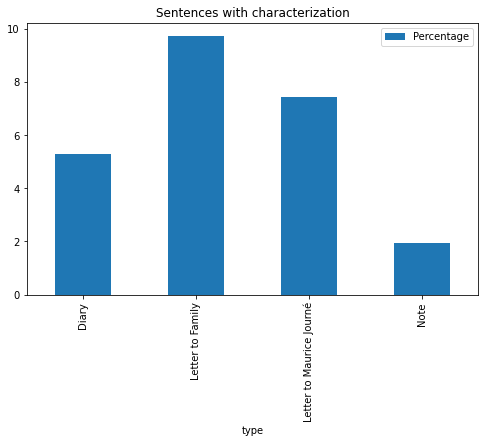

In [178]:
whole_data_type_distribution = data[["type","text"]].groupby("type").count()
annotated_data_distribution = annotated_data[["type","text"]].groupby("type").count()
fig, ax = plt.subplots(figsize=(5*1.61803398875, 5))
(annotated_data_distribution/whole_data_type_distribution*100).plot(kind="bar", ax=ax)
ax.set_title("Sentences with characterization")
ax.legend(["Percentage"])

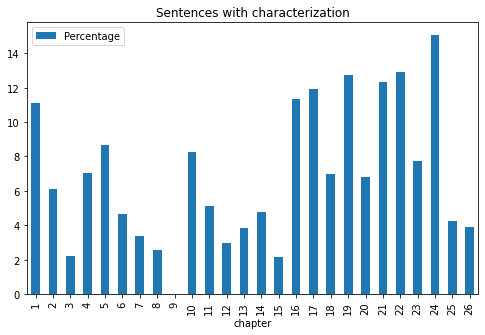

In [179]:
whole_data_type_distribution = data[["chapter","text"]].groupby("chapter").count().sort_values('chapter')
annotated_data_distribution = annotated_data[["chapter","text"]].groupby("chapter").count().sort_values('chapter')
fig, ax = plt.subplots(figsize=(5*1.61803398875, 5))
(annotated_data_distribution/whole_data_type_distribution*100).plot(kind="bar", ax=ax)
ax.set_title("Sentences with characterization")
ax.legend(["Percentage"])

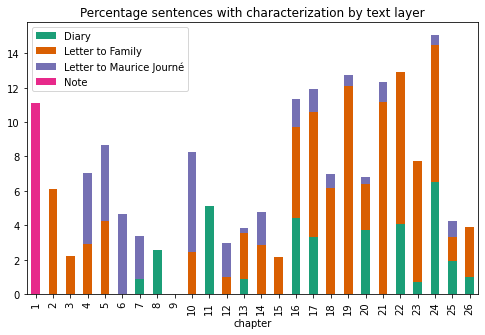

In [204]:
whole_data_type_distribution = data[["chapter","text"]].groupby("chapter").count().sort_values('chapter')
annotated_data_distribution = annotated_data[["chapter","text", "type"]].groupby(["chapter", "type"]).count().unstack('type').fillna(0)
annotated_data_distribution.loc[9] = [0,0,0,0]
annotated_data_distribution = annotated_data_distribution.sort_values('chapter')
fig, ax = plt.subplots(figsize=(5*1.61803398875, 5))
(annotated_data_distribution/whole_data_type_distribution.values*100).plot(kind="bar", ax=ax, stacked=True, color=colors[:4])
ax.set_title("Percentage sentences with characterization by text layer")
ax.legend(['Diary', 'Letter to Family', 'Letter to Maurice Journé', "Note"])
plt.savefig("sent_with_char_by_text_layer.png" ,dpi=300)

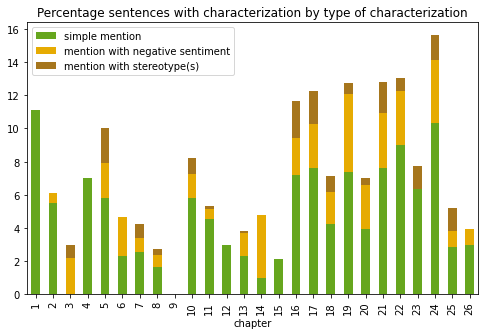

In [201]:
label_counts = []

for chapter, subdf in annotated_data[["chapter","annotations"]].groupby("chapter"):
    new_counts = {
        "simple mention": 0,
        "mention with negative sentiment": 0,
        "mention with stereotype(s)": 0,
        "chapter": chapter,
    }
    for _, row in subdf.iterrows():

        if "simple mention" in row.annotations:
            new_counts["simple mention"] +=1
        if "mention with negative sentiment" in row.annotations:
            new_counts["mention with negative sentiment"] +=1
        if "mention with stereotype(s)" in row.annotations:
            new_counts["mention with stereotype(s)"] +=1
    label_counts.append(new_counts)
    
whole_data_type_distribution = data[["chapter","annotations"]].groupby("chapter").count().sort_values('chapter')
annotated_data_distribution = pd.DataFrame(label_counts).set_index("chapter")
annotated_data_distribution.loc[9] = [0,0,0]
annotated_data_distribution = annotated_data_distribution.sort_values('chapter')
fig, ax = plt.subplots(figsize=(5*1.61803398875, 5))
(annotated_data_distribution/whole_data_type_distribution.values*100).plot(kind="bar", ax=ax, stacked=True, color=colors[4:])
ax.set_title("Percentage sentences with characterization by type of characterization")
plt.savefig("sent_with_char_by_char.png" ,dpi=300)

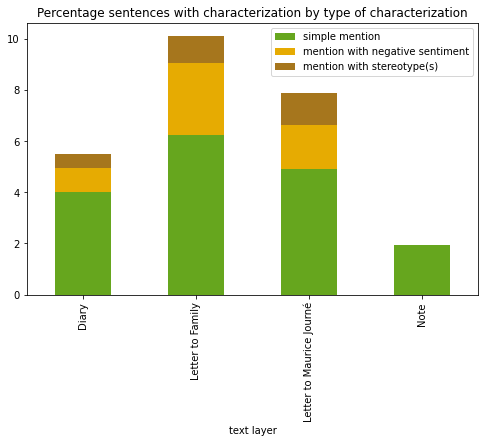

In [205]:
label_counts = []

for type_, subdf in annotated_data[["type","annotations"]].groupby("type"):
    new_counts = {
        "simple mention": 0,
        "mention with negative sentiment": 0,
        "mention with stereotype(s)": 0,
        "type": type_,
    }
    for _, row in subdf.iterrows():

        if "simple mention" in row.annotations:
            new_counts["simple mention"] +=1
        if "mention with negative sentiment" in row.annotations:
            new_counts["mention with negative sentiment"] +=1
        if "mention with stereotype(s)" in row.annotations:
            new_counts["mention with stereotype(s)"] +=1
    label_counts.append(new_counts)
    
    
whole_data_type_distribution = data[["type","annotations"]].groupby("type").count()
annotated_data_distribution = pd.DataFrame(label_counts).set_index("type")
annotated_data_distribution = annotated_data_distribution
fig, ax = plt.subplots(figsize=(5*1.61803398875, 5))
(annotated_data_distribution/whole_data_type_distribution.values*100).plot(kind="bar", ax=ax, stacked=True, color=colors[4:])
ax.set_title("Percentage sentences with characterization by type of characterization")
ax.set_xlabel("text layer")
plt.savefig("sent_with_char_by_type_char.png" ,dpi=300)

In [213]:
counts = pd.DataFrame(label_counts)
counts = counts.set_index("type")
counts

,simple mention,mention with negative sentiment,mention with stereotype(s)
type,,,
Diary,110,25,15
Letter to Family,213,95,37
Letter to Maurice Journé,66,23,17
Note,3,0,0


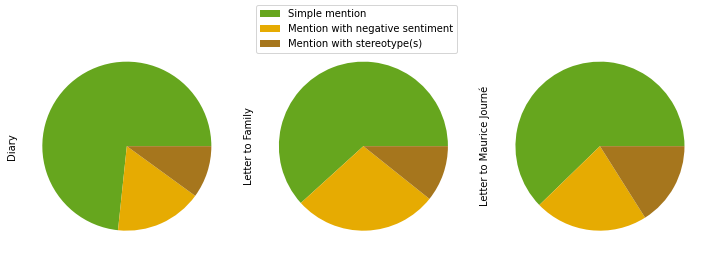

In [291]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 4))
percentage = (counts.T / counts.values.sum(axis=1).T).T


percentage.T[['Diary', 'Letter to Family', 'Letter to Maurice Journé']].plot.pie(subplots=True, ax=axes, legend=False, labels=None, colors=colors[4:])
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(['Simple mention', 'Mention with negative sentiment', 'Mention with stereotype(s)'], loc='upper center')
plt.tight_layout()
plt.savefig("ratios_characterization_type_by_text_layer.png", dpi=300)

In [242]:
percentage

,simple mention,mention with negative sentiment,mention with stereotype(s)
type,,,
Diary,0.733333,0.166667,0.100000
Letter to Family,0.617391,0.275362,0.107246
Letter to Maurice Journé,0.622642,0.216981,0.160377
Note,1.000000,0.000000,0.000000


In [160]:
for chapter, subdf in annotated_data[["chapter","annotations"]].groupby("chapter"):
    if chapter == 3:
        break;
subdf

,chapter,annotations
302,3,[Nennung mit negativen Gefühlen]
305,3,[Nennung mit negativen Gefühlen]
306,3,"[Nennung mit Stereotyp, Nennung mit negativen ..."


In [261]:
grouping = []

for (chapter, type_), subdf in data.sort_values('chapter').groupby(['chapter', 'type']):
    for _, row in subdf.iterrows():
        if "simple mention" in row.annotations:
            grouping.append({
                "chapter": chapter,
                "type": type_,
                "label": "simple mention",
                "text": row.text,
            })
            
        if "mention with negative sentiment" in row.annotations:
            grouping.append({
                "chapter": chapter,
                "type": type_,
                "label": "mention with negative sentiment",
                "text": row.text,
            })
        if "mention with stereotype(s)" in row.annotations:
            grouping.append({
                "chapter": chapter,
                "type": type_,
                "label": "mention with stereotype(s)",
                "text": row.text,
            })
        if len(row.annotations) ==0:
            grouping.append({
                "chapter": chapter,
                "type": type_,
                "label": "no characterization",
                "text": row.text,
            })

            
grouping = pd.DataFrame(grouping)
sentences = []
    
for (chapter, type_, label), subdf in grouping.groupby(['chapter', 'type', 'label']):
    sentences.append(" ".join(subdf.text.tolist()))

In [268]:
vectorizer = TfidfVectorizer()
bow = np.array(vectorizer.fit_transform(sentences).todense())
index = vectorizer.get_feature_names_out()

def get_max_n_words(vec, index, n=10):
    max_val_inds = vec.argsort()[::-1][:n]
    return [index[ind] for ind in max_val_inds]

from functools import partial

feats = list(map(partial(get_max_n_words, index=index, n=5), bow))

df = grouping.groupby(['chapter', 'type', 'label']).count()

df['top5words'] = feats

In [275]:
df.unstack("type").unstack("label").fillna(0).T.to_excel("full_picture.xlsx")

In [290]:
sentences = []
for (type_, label), subdf in grouping.groupby(["type", "label"]):
    sentences.append(" ".join(subdf.text.tolist()))

vectorizer = TfidfVectorizer()
bow = np.array(vectorizer.fit_transform(sentences).todense())
index = vectorizer.get_feature_names_out()

def get_max_n_words(vec, index, n=10):
    max_val_inds = vec.argsort()[::-1][:n]
    return [index[ind] for ind in max_val_inds]

from functools import partial

feats = list(map(partial(get_max_n_words, index=index, n=10), bow))

df = grouping.groupby(['type', 'label']).count()

df['top10words'] = feats

df[df.index.get_level_values(0) != "Note"]

df.to_excel("table.xlsx")

In [260]:
sentences[0]

["J'ai éprouvé une impression plus vive encore de l'arrivée imprévue de mes parents qui avaient fait un voyage effroyable: ils avaient quitté Reims sous les obus, en wagon à bestiaux, avec deux noirs blessés qui puaient.",
 "Je m'en fus à Langres offrir mes services à un vieux commandant de recrutement qui me reçut très aimablement.",
 "Il ajouta avec un sourire qu'on ne m'oublierait sûrement pas, et me renvoya à Fresne.",
 'A Fresne, le cours de la vie semblait interrompu.',
 "Chacun allait voir passer les trains de soldats,à la gare, et l'on offrait tout ce que l'on pouvait.",
 "Nous nous refusions les moindres satisfactions: c'était la guerre.",
 'Les nouvelles étaient rares, contradictoires.',
 "L'on discutait à perte de vue sur les élucubrations du Lieutenant Colonel Rousset ou du Général Verraux - dès que les journaux, enfin nous parvinrent.",
 "Mon frère et moi nous étions mis à la disposition d'une famille de cultivateurs dont le père était G.V.C. Nous avions fait les foins, pu